# Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import os
from termcolor import colored
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading dataframes:

In [2]:
df_customer = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('../input/brazilian-ecommerce/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('../input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
df_products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
df_sellers = pd.read_csv('../input/brazilian-ecommerce/olist_sellers_dataset.csv')
df_product_category_name=pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

# Exploring our dataset:
viewing first few cells and dimensions of each dataframe

In [3]:
def explore(fname):   
    print(colored('\nTable preview:', 'blue', attrs=['bold']))
    with pd.option_context('display.max_rows', 5,
                       'display.max_columns', None,
                       'display.width', 1000,
                       'display.precision', 3,
                       'display.colheader_justify', 'left'):
        display(fname)
        
    print(colored('\nShape:', 'blue', attrs=['bold']))
    print(fname.shape)
    
    print(colored('\nInformation:', 'blue', attrs=['bold']))
    print(fname.info())
    
    print(colored('\n\nDescription:', 'blue', attrs=['bold']))
    with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 1000,
                       'display.precision', 3,
                       'display.colheader_justify', 'left'):
        display(fname.describe(include='all'))

In [4]:
explore(df_customer)


Table preview:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
...,...,...,...,...,...
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP



Shape:
(99441, 5)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Description:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.475,NaN,NaN
std,NaN,NaN,29797.939,NaN,NaN
min,NaN,NaN,1003.000,NaN,NaN
25%,NaN,NaN,11347.000,NaN,NaN
50%,NaN,NaN,24416.000,NaN,NaN
75%,NaN,NaN,58900.000,NaN,NaN


In [5]:
explore(df_geolocation)


Table preview:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.546,-46.639,sao paulo,SP
1,1046,-23.546,-46.645,sao paulo,SP
...,...,...,...,...,...
1000161,99980,-28.389,-51.847,david canabarro,RS
1000162,99950,-28.070,-52.019,tapejara,RS



Shape:
(1000163, 5)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


Description:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000e+06,1.000e+06,1.000e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657e+04,-2.118e+01,-4.639e+01,NaN,NaN
std,3.055e+04,5.716e+00,4.270e+00,NaN,NaN
min,1.001e+03,-3.661e+01,-1.015e+02,NaN,NaN
25%,1.108e+04,-2.360e+01,-4.857e+01,NaN,NaN
50%,2.653e+04,-2.292e+01,-4.664e+01,NaN,NaN
75%,6.350e+04,-1.998e+01,-4.377e+01,NaN,NaN


In [6]:
explore(df_order_items)


Table preview:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
...,...,...,...,...,...,...,...
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79



Shape:
(112650, 7)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


Description:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000,112650,112650,112650,112650.000,112650.000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.198,NaN,NaN,NaN,120.654,19.990
std,NaN,0.705,NaN,NaN,NaN,183.634,15.806
min,NaN,1.000,NaN,NaN,NaN,0.850,0.000
25%,NaN,1.000,NaN,NaN,NaN,39.900,13.080
50%,NaN,1.000,NaN,NaN,NaN,74.990,16.260
75%,NaN,1.000,NaN,NaN,NaN,134.900,21.150


In [7]:
explore(df_order_payments)


Table preview:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
...,...,...,...,...,...
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58



Shape:
(103886, 5)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


Description:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000,103886,103886.000,103886.000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.093,NaN,2.853,154.100
std,NaN,0.707,NaN,2.687,217.494
min,NaN,1.000,NaN,0.000,0.000
25%,NaN,1.000,NaN,1.000,56.790
50%,NaN,1.000,NaN,1.000,100.000
75%,NaN,1.000,NaN,4.000,171.838


In [8]:
explore(df_order_reviews)


Table preview:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
...,...,...,...,...,...,...,...
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49



Shape:
(99224, 7)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


Description:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086,NaN,NaN,NaN,NaN
std,NaN,NaN,1.348,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000,NaN,NaN,NaN,NaN


In [9]:
explore(df_orders)


Table preview:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
...,...,...,...,...,...,...,...,...
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00



Shape:
(99441, 8)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


Description:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [10]:
explore(df_products)


Table preview:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
...,...,...,...,...,...,...,...,...,...
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0



Shape:
(32951, 9)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


Description:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000,32341.000,32341.000,32949.000,32949.000,32949.000,32949.000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.477,771.495,2.189,2276.472,30.815,16.938,23.197
std,NaN,NaN,10.246,635.115,1.737,4282.039,16.914,13.638,12.079
min,NaN,NaN,5.000,4.000,1.000,0.000,7.000,2.000,6.000
25%,NaN,NaN,42.000,339.000,1.000,300.000,18.000,8.000,15.000
50%,NaN,NaN,51.000,595.000,1.000,700.000,25.000,13.000,20.000
75%,NaN,NaN,57.000,972.000,3.000,1900.000,38.000,21.000,30.000


In [11]:
explore(df_sellers)


Table preview:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
...,...,...,...,...
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP



Shape:
(3095, 4)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


Description:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059,NaN,NaN
std,NaN,32713.454,NaN,NaN
min,NaN,1001.000,NaN,NaN
25%,NaN,7093.500,NaN,NaN
50%,NaN,14940.000,NaN,NaN
75%,NaN,64552.500,NaN,NaN


In [12]:
explore(df_product_category_name)


Table preview:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
...,...,...
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services



Shape:
(71, 2)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


Description:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


After exploring all the datasets and looking for what is common, it is merging time :) a dataset containing all these dataframes will be so much better

In [13]:
df_train = df_orders.merge(df_order_items, on='order_id', how='left')
df_train = df_train.merge(df_order_payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(df_order_reviews, on='order_id', how='outer')
df_train = df_train.merge(df_products, on='product_id', how='outer')
df_train = df_train.merge(df_customer, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers, on='seller_id', how='outer')

In [14]:
explore(df_train)


Table preview:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119141,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,1.0,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,1.0,credit_card,4.0,244.02,ec2817e750153dfdd61894780dfc5d9e,4.0,NaN,NaN,2018-06-10 00:00:00,2018-06-13 09:17:47,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,8320.0,sao paulo,SP
119142,1565f22aa9452ff278638e87cc895678,56772dfbcbe7df908a284ff0d53adf7d,delivered,2018-05-15 17:41:00,2018-05-16 03:35:29,2018-05-16 17:20:00,2018-05-21 14:31:41,2018-05-29 00:00:00,1.0,9c1e194db1d35a79d962ea610bfe0868,f3862c2188522d89860c38a3ea8b550d,2018-05-22 03:35:29,15.50,12.79,1.0,boleto,1.0,28.29,cbb879403973e209b4df371a5dafbaa7,5.0,NaN,NaN,2018-06-01 00:00:00,2018-06-01 15:14:23,perfumaria,40.0,871.0,1.0,83.0,17.0,8.0,13.0,6ceea7c1088e15ab3c67980a2d9bb309,9687,sao bernardo do campo,SP,14092.0,ribeirao preto,SP



Shape:
(119143, 39)

Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
count,119143,119143,119143,119143,118966,117057,115722,119143,118310.000,118310,118310,118310,118310.000,118310.000,119140.000,119140,119140.000,119140.000,118146,118146.000,13989,50245,118146,118146,116601,116601.000,116601.000,116601.000,118290.000,118290.000,118290.000,118290.000,119143,119143.000,119143,119143,118310.000,118310,118310
unique,99441,99441,8,98875,90733,81018,95664,459,NaN,32951,3095,93318,NaN,NaN,NaN,5,NaN,NaN,98410,NaN,4527,36159,636,98248,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96096,NaN,4119,27,NaN,611,23
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,sao paulo,SP
freq,63,63,115723,63,63,63,63,663,NaN,536,2155,63,NaN,NaN,NaN,87776,NaN,NaN,63,NaN,494,259,547,63,11988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN,18875,50265,NaN,29293,84377
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.197,NaN,NaN,NaN,120.647,20.032,1.095,NaN,2.941,172.735,NaN,4.016,NaN,NaN,NaN,NaN,NaN,48.767,785.968,2.205,2112.251,30.265,16.620,23.075,NaN,35033.451,NaN,NaN,24442.410,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699,NaN,NaN,NaN,184.110,15.837,0.730,NaN,2.778,267.776,NaN,1.400,NaN,NaN,NaN,NaN,NaN,10.034,652.584,1.717,3786.695,16.189,13.454,11.749,NaN,29823.199,NaN,NaN,27573.005,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,0.850,0.000,1.000,NaN,0.000,0.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,5.000,4.000,1.000,0.000,7.000,2.000,6.000,NaN,1003.000,NaN,NaN,1001.000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,39.900,13.080,1.000,NaN,1.000,60.850,NaN,4.000,NaN,NaN,NaN,NaN,NaN,42.000,346.000,1.000,300.000,18.000,8.000,15.000,NaN,11250.000,NaN,NaN,6429.000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,74.900,16.280,1.000,NaN,2.000,108.160,NaN,5.000,NaN,NaN,NaN,NaN,NaN,52.000,600.000,1.000,700.000,25.000,13.000,20.000,NaN,24240.000,NaN,NaN,13660.000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,134.900,21.180,1.000,NaN,4.000,189.240,NaN,5.000,NaN,NaN,NaN,NaN,NaN,57.000,983.000,3.000,1800.000,38.000,20.000,30.000,NaN,58475.000,NaN,NaN,27972.000,NaN,NaN


In [15]:
df_train.isnull().sum().sort_values(ascending=False)

review_comment_title             105154
review_comment_message            68898
order_delivered_customer_date      3421
product_photos_qty                 2542
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
order_delivered_carrier_date       2086
review_creation_date                997
review_answer_timestamp             997
review_score                        997
review_id                           997
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853
product_weight_g                    853
seller_zip_code_prefix              833
seller_city                         833
seller_state                        833
order_item_id                       833
freight_value                       833
price                               833
shipping_limit_date                 833
seller_id                           833
product_id                          833


Now that might seem a bit messy, so let's group them by data types

In [16]:
id_cols = ['order_id', 'seller_id', 'customer_id', 'order_item_id', 'product_id', 
           'review_id', 'customer_unique_id', 'seller_zip_code_prefix']

#categorical columns
cat_cols = df_train.nunique()[df_train.nunique() <= 27].keys().tolist()

#numerical columns
num_cols = [x for x in df_train.columns if x not in cat_cols + id_cols]

#Binary columns with 2 values
bin_cols = df_train.nunique()[df_train.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# EDA

# 1 Price Distribution:

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


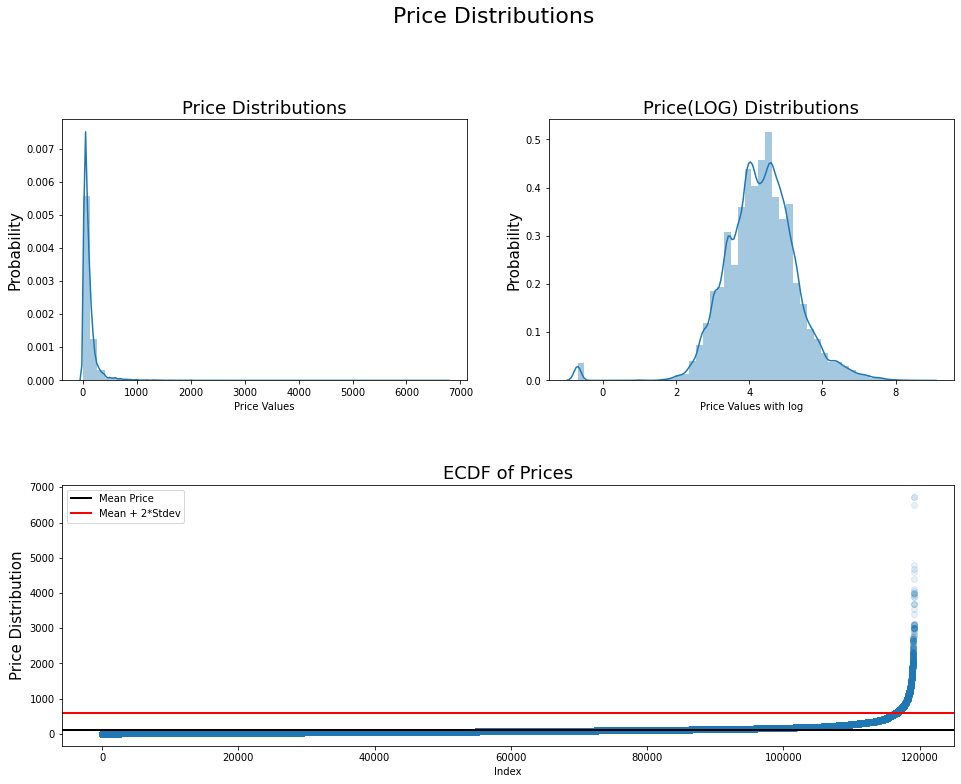

In [18]:
df_train['price'].fillna(-1, inplace=True)

plt.figure(figsize=(16,12))
plt.suptitle('Price Distributions', fontsize=22)
plt.subplot(221)
g = sns.distplot(df_train['price'])
g.set_title("Price Distributions", fontsize=18)
g.set_xlabel("Price Values")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(df_train['price']+1.5))
g1.set_title("Price(LOG) Distributions", fontsize=18)
g1.set_xlabel("Price Values with log")
g1.set_ylabel("Probability", fontsize=15)

plt.subplot(212)
g4 = plt.scatter(range(df_train.shape[0]),
                 np.sort(df_train['price'].values), 
                 alpha=.1)
g4= plt.title("ECDF of Prices", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Price Distribution", fontsize=15)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean(), color='black', 
           label='Mean Price', linewidth=2)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean() + (2.5*df_train[df_train['price'] != -1]['price'].std()),
                 color='red', 
           label='Mean + 2*Stdev', linewidth=2)
g4 = plt.legend()

plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()

In [19]:
df_train['price_log'] = np.log(df_train['price'] + 1.5)


# Payment Type


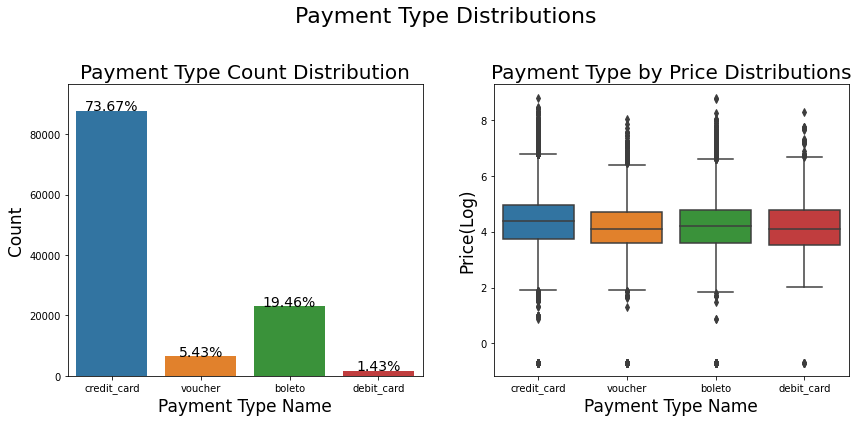

In [20]:
total = len(df_train)

plt.figure(figsize=(14,6))

plt.suptitle('Payment Type Distributions', fontsize=22)

plt.subplot(121)
g = sns.countplot(x='payment_type', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(122)
g = sns.boxplot(x='payment_type', y='price_log', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type by Price Distributions", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Price(Log)", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.8)

plt.show()


It seems that most of the users opt for credit card, 73.67. Seeing the price distribution, the price does not affect the payment method, the min, max 1st, 2nd and 3rd quartiles are almost equal.

# Customers

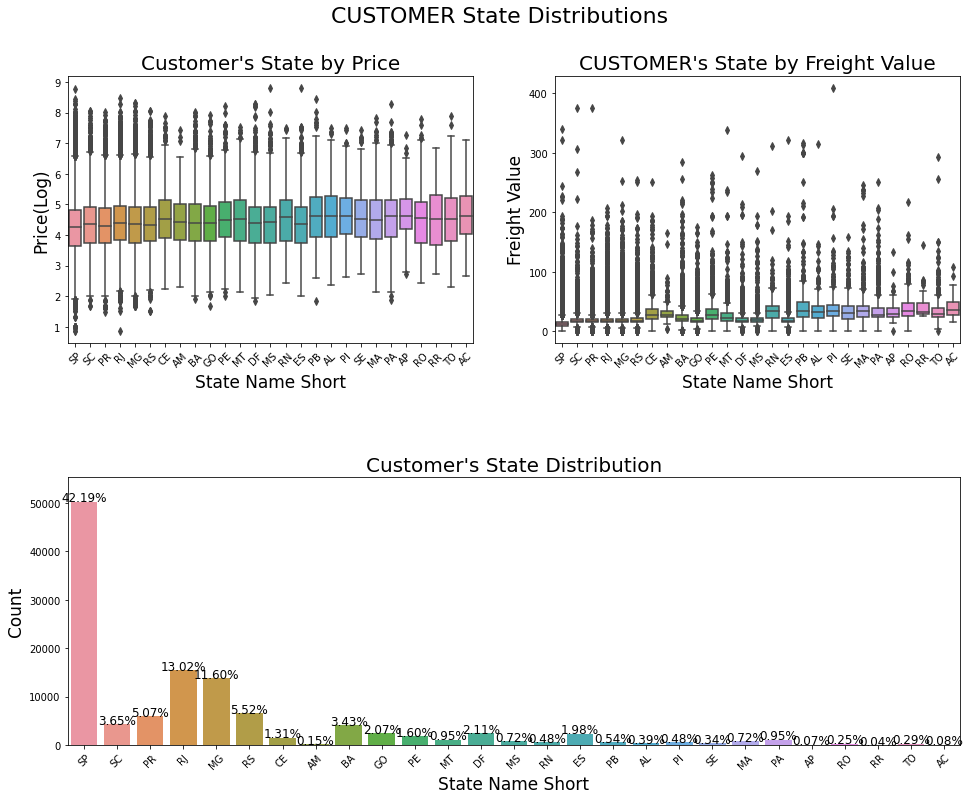

In [21]:
plt.figure(figsize=(16,12))

plt.suptitle('CUSTOMER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='customer_state', data=df_train, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='customer_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Customer's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='customer_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

# Sellers

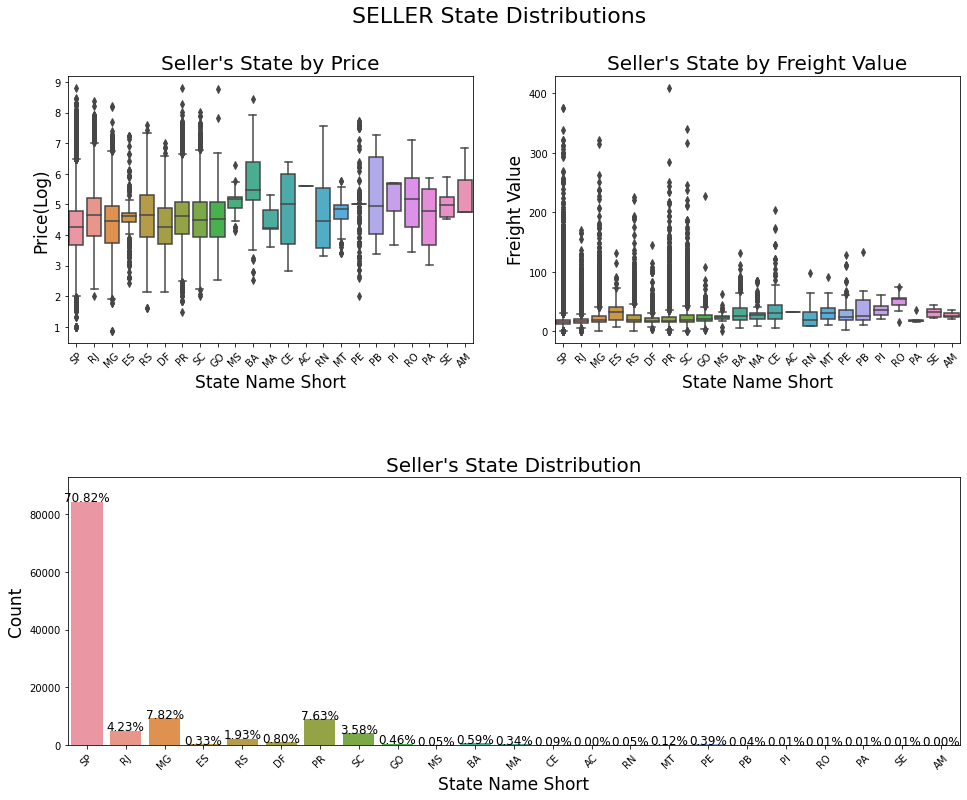

In [22]:
plt.figure(figsize=(16,12))

plt.suptitle('SELLER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='seller_state', data=df_train, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='seller_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Seller's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='seller_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("Seller's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

# Mean Freight by States

In [23]:
# Seting regions
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

df_train.loc[df_train['customer_state'].isin(sudeste), 'cust_Region'] = 'Southeast'
df_train.loc[df_train['customer_state'].isin(nordeste), 'cust_Region'] = 'Northeast'
df_train.loc[df_train['customer_state'].isin(norte), 'cust_Region'] = 'North'
df_train.loc[df_train['customer_state'].isin(centro_oeste), 'cust_Region'] = 'Midwest'
df_train.loc[df_train['customer_state'].isin(sul), 'cust_Region'] = 'South'

# Order Item Id

In [24]:
df_train['ord_new'] = df_train['order_item_id'].copy()

df_train.loc[df_train['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
df_train.loc[(df_train['order_item_id'] > 10), 'ord_new'] = '10 to 20'

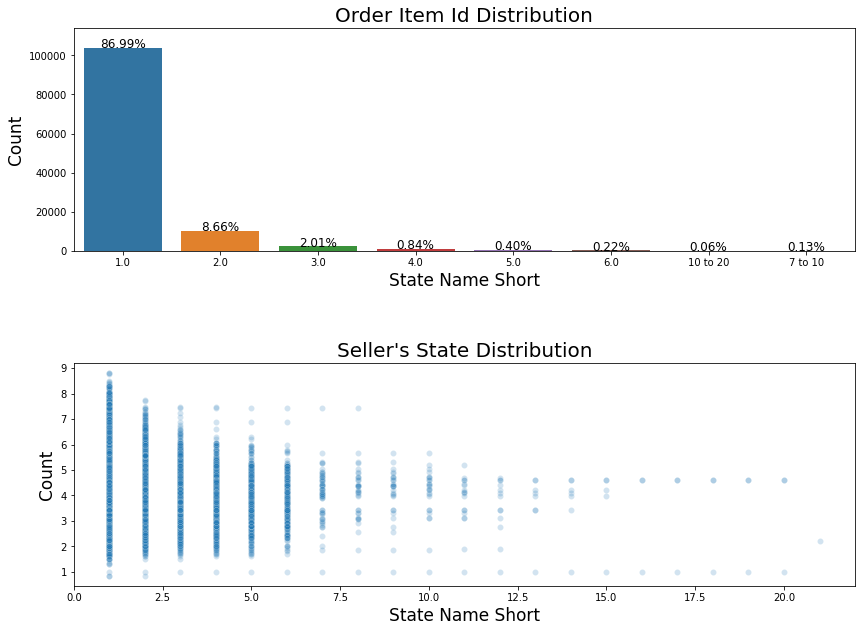

In [25]:
plt.figure(figsize=(14,10))


plt.subplot(211)
g = sns.countplot(x='ord_new', data=df_train)
g.set_title("Order Item Id Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(212)
g1 = sns.scatterplot(x='order_item_id', y='price_log',
                     data=df_train, alpha=.2)
g1.set_title("Seller's State Distribution", fontsize=20)
g1.set_xlabel("State Name Short", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

# Total items by Review Score

In [26]:
round(pd.crosstab(df_train['order_item_id'], df_train['review_score'], normalize='index') *100,2)[:12].T

order_item_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
review_score,,,,,,,,,,,,
1.0,11.09,21.97,25.60,28.78,29.89,32.95,41.67,41.67,50.00,52.0,47.06,50.00
2.0,3.16,5.73,6.19,6.33,6.02,3.88,3.33,0.00,0.00,0.0,0.00,0.00
3.0,8.25,9.31,9.28,8.98,9.03,10.08,13.33,13.89,14.29,16.0,17.65,8.33
4.0,19.42,16.08,15.85,15.51,16.13,15.89,15.00,19.44,17.86,12.0,17.65,16.67
5.0,58.08,46.91,43.07,40.41,38.92,37.21,26.67,25.00,17.86,20.0,17.65,25.00
